<a href="https://colab.research.google.com/github/agarwalsourabh55/Deep-learning/blob/deep_learning_dev/Deep_Learning.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [3]:
import torch

## Create the Empty Tensor
x= torch.empty(3)
print(x)
x= torch.empty(2,3)
x= torch.empty(2,2,3)

tensor([7.2105e-37, 0.0000e+00, 4.4842e-44])


In [2]:
## Creating torch with random values 

In [4]:
torch.randn(2,3)

tensor([[ 0.7233,  0.0378, -0.9199],
        [ 1.4418, -1.2958, -0.3074]])

In [5]:
torch.ones(2,2)

tensor([[1., 1.],
        [1., 1.]])

In [7]:
## Giving Specific Data type
x.dtype  ## default float.32
x= torch.ones(2,2,dtype=  torch.double)
print(x.size())

torch.Size([2, 2])


In [8]:
x= torch.tensor([2.5,0.1])
print(x)

tensor([2.5000, 0.1000])


In [9]:
x= torch.randn(2,2)
y= torch.randn(2,2)
print(x)
print(y)

tensor([[-0.4172,  0.2090],
        [ 0.5973, -0.6693]])
tensor([[ 1.6284, -1.3117],
        [ 0.0707, -0.1412]])


In [11]:
## Addition
z= x+y
print(z) # Element wise addition

tensor([[ 1.2112, -1.1028],
        [ 0.6680, -0.8105]])


In [12]:
z= torch.add(x,y)
print(z)

tensor([[ 1.2112, -1.1028],
        [ 0.6680, -0.8105]])


In [14]:
## inplace addition
y.add_(x) ## will modify y

## Every funciton that has _ aat the last will do the inplace operation

tensor([[ 0.7940, -0.8938],
        [ 1.2653, -1.4798]])

In [15]:
## substaraction
z= x-y
z=torch.sub(x,y)


In [16]:
## Multipliacatino
y.mul_(x)

tensor([[-0.3312, -0.1868],
        [ 0.7557,  0.9904]])

In [17]:
## division 
torch.div(x,y)

tensor([[ 1.2595, -1.1188],
        [ 0.7904, -0.6758]])

In [19]:
## slicing Operations

x= torch.rand(5,3)
print(x[:,0])
print(x)

tensor([0.3283, 0.7036, 0.6271, 0.6988, 0.4320])
tensor([[0.3283, 0.1578, 0.4797],
        [0.7036, 0.8818, 0.5780],
        [0.6271, 0.4285, 0.4365],
        [0.6988, 0.3112, 0.2248],
        [0.4320, 0.7449, 0.2854]])


In [21]:
x[1,2]

tensor(0.5780)

In [22]:
## Willge tthe actual value
x[1,2].item()

0.5779715180397034

In [24]:
## reshaping operation
x= torch.rand(4,4)
print(x)
y= x.view(16)
print(y)

tensor([[0.2961, 0.9147, 0.7951, 0.4519],
        [0.0882, 0.6399, 0.0094, 0.0505],
        [0.4640, 0.1325, 0.9942, 0.0237],
        [0.6641, 0.5004, 0.4337, 0.2985]])
tensor([0.2961, 0.9147, 0.7951, 0.4519, 0.0882, 0.6399, 0.0094, 0.0505, 0.4640,
        0.1325, 0.9942, 0.0237, 0.6641, 0.5004, 0.4337, 0.2985])


In [27]:
y= x.view(-1,4)
print(y.size())

torch.Size([4, 4])


In [28]:
import numpy as np

#converting numpy to tensor
a = torch.ones(5)
print(a)
b = a.numpy()
print(type(b))

tensor([1., 1., 1., 1., 1.])
<class 'numpy.ndarray'>


In [29]:
a.add_(1)

tensor([2., 2., 2., 2., 2.])

In [31]:
## Also added +1 to the b also..because they point to the same memory location
print(a)
print(b)

tensor([2., 2., 2., 2., 2.])
[2. 2. 2. 2. 2.]


In [32]:
a= np.ones(5)
print(a)

[1. 1. 1. 1. 1.]


In [33]:
b= torch.from_numpy(a)
print(b)

tensor([1., 1., 1., 1., 1.], dtype=torch.float64)


In [35]:
a+=1

In [37]:
## This happen only when you have tensor on the GPU
print(a)
print(b)

[2. 2. 2. 2. 2.]
tensor([2., 2., 2., 2., 2.], dtype=torch.float64)


In [40]:
## checking cuda availability
if torch.cuda.is_available():
  device = torch.device("cuda")
  x = torch.ones(5,device = device)
  y = torch.ones(5)
  y= y.to(device)

  z= x+y
  z.numpy()## will return error because numpy only handle CPU tensors not GPU
  z = z.to("cpu")
else:
  print("not available")

not available


In [42]:

x = torch.ones(5,requires_grad = True)  ## tellthe pytroch that it will nees to calculate the gradients
print(x)

tensor([1., 1., 1., 1., 1.], requires_grad=True)


In [53]:
## Autgrad package and Calculating Gradients
import torch
x= torch.randn(3,requires_grad = True)
print(x)

tensor([0.9422, 1.3274, 0.2494], requires_grad=True)


In [54]:
y = x+2 ## will create the computational graph    x                      this is forward pass
                                                      # +   y
                                                  # 2
## pytorch will automatically create the function that will later use to creat the backpropogation function_name = Addbackward

print(y)

tensor([2.9422, 3.3274, 2.2494], grad_fn=<AddBackward0>)


In [55]:
z= y*y*2
print(z)


tensor([17.3136, 22.1426, 10.1199], grad_fn=<MulBackward0>)


In [56]:
z= z.mean()
print(z)

tensor(16.5254, grad_fn=<MeanBackward0>)


In [57]:
z.backward() ## tocalulat ethe gradient of z with respect tox
print(x.grad)  ## x store that gradient
## in backward it will creat the vector of jacobian matrix

tensor([3.9230, 4.4365, 2.9992])


In [58]:
x= torch.randn(3,requires_grad= True)
y= x+2
z= y*y*2

# z.backward()
# print(x.grad)# this will give error need to add one line 

v = torch.tensor([0.1,1.0,0.001], dtype = torch.float32)
z.backward(v)
print(x.grad)

tensor([0.8598, 5.9732, 0.0117])


In [59]:
## Call the requires_grad_(False)
## x.detach() ## create new tensor that doesn't reauire gradieent
## with torch.no_grad():

x= torch.randn(3,requires_grad = True)
print(x)
x.requires_grad_(False)


tensor([ 1.5585, -0.6175, -1.0777], requires_grad=True)


tensor([ 1.5585, -0.6175, -1.0777])

In [60]:
y = x.detach()
print(y)

tensor([ 1.5585, -0.6175, -1.0777])


In [65]:
x= torch.randn(3,requires_grad = True)
with torch.no_grad():
  y = x+2
  print(y) ## y don't have gradient function
print(x) ## x has gradient

tensor([2.6250, 2.2028, 0.5080])
tensor([ 0.6250,  0.2028, -1.4920], requires_grad=True)


In [66]:
## Whenever we call the backward function the value will be accumulated in the x

In [74]:
weights = torch.ones(4,requires_grad = True)
for epoch in range(2):
  model_output = (weights*3).sum()
  model_output.backward()
  print(weights.grad)
  weights.grad.zero_()  # need to add this to prevent gradient to calculate on every iteration


tensor([3., 3., 3., 3.])
tensor([3., 3., 3., 3.])


In [83]:
weights = torch.ones(4,requires_grad = True)


optimizer = torch.optim.SGD([weights] , lr = 0.01)
optimizer.step()
optimizer.zero_grad()

In [86]:
weights = torch.ones(4,requires_grad = True)

## these are autograd package
# z.backward()
# weights.grad.zero_()

In [87]:
## Backpropogation

## forward pass: compute Loss
## Compute local gradients
## Backward pass: Compute dLoss / dWeights using the Chain Rule
x = torch.tensor(1.0)
y = torch.tensor(2.0)

w = torch.tensor(1.0,requires_grad = True)

## Forward pass and compute the loss
y_hat = w*x
loss = (y_hat - y)**2

print(loss)

# backward pass
loss.backward()
print(w.grad)

### update weights
### next forward and backwars




tensor(1., grad_fn=<PowBackward0>)
tensor(-2.)


In [2]:
import numpy as np
import torch

X = np.array([1,2,3,4],dtype= np.float32)
Y  = np.array([2,4,6,8],dtype = np.float32)

w = 0.0

# Model Prediction
def forward(x):
  return w*x

## loss = MSE
def loss(y,y_predicted):
  return((y_predicted-y)**2).mean()

# gradient
# MSE =1/N * (w*x - y)**2
# dJ/dw = 1/N 2x (w*x -y)

def gradient(x,y,y_predicted):
  return np.dot(2*x, y_predicted-y).mean()

print(f'Prediction before training: f(5) = {forward(5):.3f}')

# Training
learning_rate = 0.01
n_iters = 10

for epoch in range(n_iters):
  # prediction = forward pass
  y_pred = forward(X)
  l = loss(Y,y_pred)

  ## gradients
  dw = gradient(X,Y,y_pred)

  # update weights
  w -= learning_rate * dw

  if epoch % 1 ==0:
    print(f'epoch {epoch+1}: w = {w:.3f}, loss = {l:.8f}')

print(f'Prediction after Training : f(5) = {forward(5):.3f}')


Prediction before training: f(5) = 0.000
epoch 1: w = 1.200, loss = 30.00000000
epoch 2: w = 1.680, loss = 4.79999924
epoch 3: w = 1.872, loss = 0.76800019
epoch 4: w = 1.949, loss = 0.12288000
epoch 5: w = 1.980, loss = 0.01966083
epoch 6: w = 1.992, loss = 0.00314574
epoch 7: w = 1.997, loss = 0.00050331
epoch 8: w = 1.999, loss = 0.00008053
epoch 9: w = 1.999, loss = 0.00001288
epoch 10: w = 2.000, loss = 0.00000206
Prediction after Training : f(5) = 9.999


In [5]:
# import numpy as np
import torch

X = torch.tensor([1,2,3,4],dtype= torch.float32)
Y  =torch.tensor([2,4,6,8],dtype = torch.float32)

w = torch.tensor(0.0,dtype = torch.float32, requires_grad= True)

# Model Prediction
def forward(x):
  return w*x

## loss = MSE
def loss(y,y_predicted):
  return((y_predicted-y)**2).mean()

# gradient
# MSE =1/N * (w*x - y)**2
# dJ/dw = 1/N 2x (w*x -y)

# def gradient(x,y,y_predicted):
#   return np.dot(2*x, y_predicted-y).mean()

print(f'Prediction before training: f(5) = {forward(5):.3f}')

# Training
learning_rate = 0.01
n_iters = 100

for epoch in range(n_iters):
  # prediction = forward pass
  y_pred = forward(X)
  l = loss(Y,y_pred)

  ## gradients
  # dw = gradient(X,Y,y_pred)
  l.backward() ## calulate the gradient of loss dl/dw

  # update weights
  with torch.no_grad():
    w -= learning_rate * w.grad

  ## empty zero gradient
  w.grad.zero_()
  
  if epoch % 1 ==0:
    print(f'epoch {epoch+1}: w = {w:.3f}, loss = {l:.8f}')

print(f'Prediction after Training : f(5) = {forward(5):.3f}')


Prediction before training: f(5) = 0.000
epoch 1: w = 0.300, loss = 30.00000000
epoch 2: w = 0.555, loss = 21.67499924
epoch 3: w = 0.772, loss = 15.66018772
epoch 4: w = 0.956, loss = 11.31448650
epoch 5: w = 1.113, loss = 8.17471695
epoch 6: w = 1.246, loss = 5.90623236
epoch 7: w = 1.359, loss = 4.26725292
epoch 8: w = 1.455, loss = 3.08308983
epoch 9: w = 1.537, loss = 2.22753215
epoch 10: w = 1.606, loss = 1.60939169
epoch 11: w = 1.665, loss = 1.16278565
epoch 12: w = 1.716, loss = 0.84011245
epoch 13: w = 1.758, loss = 0.60698116
epoch 14: w = 1.794, loss = 0.43854395
epoch 15: w = 1.825, loss = 0.31684780
epoch 16: w = 1.851, loss = 0.22892261
epoch 17: w = 1.874, loss = 0.16539653
epoch 18: w = 1.893, loss = 0.11949898
epoch 19: w = 1.909, loss = 0.08633806
epoch 20: w = 1.922, loss = 0.06237914
epoch 21: w = 1.934, loss = 0.04506890
epoch 22: w = 1.944, loss = 0.03256231
epoch 23: w = 1.952, loss = 0.02352631
epoch 24: w = 1.960, loss = 0.01699772
epoch 25: w = 1.966, loss = 

In [8]:
## Remove manuall work from previous cell
# 1) Design Model (input,output_size,forward pass)
# 2) Construct loss and optimizer
# 3) Training loop
#  - forward pass: compute predictions
#  - backward pass: gradients
#  - update weights
#   iterate the couple of times for the best result

import torch
import torch.nn as nn

X = torch.tensor([ [1]
                  ,[2]
                  ,[3]
                  ,[4]],dtype= torch.float32)
Y  =torch.tensor([ [2]
                  ,[4]
                  ,[6]
                  ,[8]],dtype = torch.float32)

X_test = torch.tensor([5],dtype = torch.float32)

n_samples,n_features = X.shape
print(n_samples,n_features)

input_size = n_features
output_size = n_features

# model = nn.Linear(input_size,output_size)

# OR
## For custom Model

class LinearRegression(nn.Module):

  def __init__(self,input_dim, output_dim):
    super(LinearRegression,self).__init__()
    self.lin = nn.Linear(input_dim,output_dim)

  def forward(self,x):
    return self.lin(x)

model = LinearRegression(input_size , output_size)


print(f'Prediction before training: f(5) = {model(X_test).item():.3f}')

# Training
learning_rate = 0.01
n_iters = 100

loss = nn.MSELoss()
optimizer = torch.optim.SGD(model.parameters(), lr = learning_rate)

for epoch in range(n_iters):
  # prediction = forward pass
  y_pred = model(X)
  l = loss(Y,y_pred)

  ## gradients
  # dw = gradient(X,Y,y_pred)
  l.backward() ## calulate the gradient of loss dl/dw

  # update weights
  # with torch.no_grad():
  #   w -= learning_rate * w.grad
  optimizer.step()
  ## empty zero gradient
  # w.grad.zero_()
  optimizer.zero_grad()
  
  if epoch % 10 ==0:
    [w,b]= model.parameters()
    print(f'epoch {epoch+1}: w = {w[0][0].item():.3f}, loss = {l:.8f}')

print(f'Prediction after Training : f(5) = {model(X_test).item():.3f}')



4 1
Prediction before training: f(5) = -2.793
epoch 1: w = -0.181, loss = 48.96280289
epoch 11: w = 1.428, loss = 1.36606526
epoch 21: w = 1.693, loss = 0.12884462
epoch 31: w = 1.742, loss = 0.09139267
epoch 41: w = 1.756, loss = 0.08529816
epoch 51: w = 1.765, loss = 0.08031323
epoch 61: w = 1.772, loss = 0.07563814
epoch 71: w = 1.779, loss = 0.07123555
epoch 81: w = 1.785, loss = 0.06708927
epoch 91: w = 1.791, loss = 0.06318435
Prediction after Training : f(5) = 9.582


torch.Size([100])
torch.Size([100, 1])
epoch: 10, loss = 4405.9434
epoch: 20, loss = 3287.7805
epoch: 30, loss = 2478.4160
epoch: 40, loss = 1891.9624
epoch: 50, loss = 1466.6166
epoch: 60, loss = 1157.8466
epoch: 70, loss = 933.5183
epoch: 80, loss = 770.4158
epoch: 90, loss = 651.7463
epoch: 100, loss = 565.3505


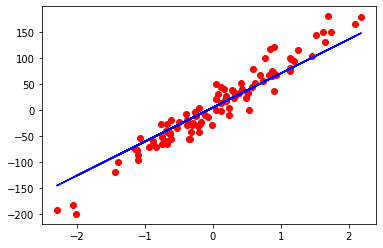

In [4]:

import torch
import torch.nn as nn
import numpy as np
from sklearn import datasets
import matplotlib.pyplot as plt

# 0 Prepare Data
X_numpy, y_numpy = datasets.make_regression(n_samples= 100, n_features=1,noise=20,random_state = 1)
X= torch.from_numpy(X_numpy.astype(np.float32))
y= torch.from_numpy(y_numpy.astype(np.float32))

print(y.shape)
y = y.view(y.shape[0],1)  ## Will reshape the tensor
print(y.shape)

n_samples,n_features = X.shape
# 1 model

input_size = n_features
output_size = 1
model = nn.Linear(input_size,output_size)


# 2 loss and optimizer
learning_rate = 0.01
criterion = nn.MSELoss()
optimizer = torch.optim.SGD(model.parameters(),lr= learning_rate)

# 3 training loop
num_epochs = 100

for epoch in range(num_epochs):
  #  Forward pass and loss
  y_predicted = model(X)
  loss = criterion(y_predicted,y)

  # backward pass
  loss.backward()

  # update
  optimizer.step()

  optimizer.zero_grad()

  if (epoch+1) % 10==0:
    print(f'epoch: {epoch+1}, loss = {loss.item():.4f}')

#plot 
predicted = model(X).detach().numpy()
plt.plot(X_numpy,y_numpy,'ro')
plt.plot(X_numpy, predicted,'b')
plt.show()

In [14]:
import torch
import torch.nn as nn
import numpy as np
from sklearn import datasets
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split

# 0) prepare data
bc = datasets.load_breast_cancer()
X,y = bc.data , bc.target

n_samples,n_features =X.shape
print(n_samples, n_features)

X_train,X_test,y_train,y_test = train_test_split(X,y ,test_size = 0.2,random_state = 1234)


# 1) model
# 2) loss and optimizer
# 3) training loop

569 30


In [3]:

import torch
import torch.nn as nn
import numpy as np
from sklearn import datasets
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split

# 0) prepare data
bc = datasets.load_breast_cancer()
X,y = bc.data , bc.target

n_samples,n_features =X.shape
print(n_samples, n_features)

X_train,X_test,y_train,y_test = train_test_split(X,y ,test_size = 0.2,random_state = 1234)


sc =StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

X_train = torch.from_numpy(X_train.astype(np.float32))
X_test = torch.from_numpy(X_test.astype(np.float32))
y_train = torch.from_numpy(y_train.astype(np.float32))
y_test = torch.from_numpy(y_test.astype(np.float32))

y_train = y_train.view(y_train.shape[0],1)
y_test = y_test.view(y_test.shape[0],1)

# model
class LogisticRegression(nn.Module):
  def __init__(self,n_input_features):
    super(LogisticRegression,self).__init__()
    self.linear = nn.Linear(n_input_features, 1)

  def forward(self,x):
    y_predicted = torch.sigmoid(self.linear(x))
    return y_predicted

model = LogisticRegression(n_features)

# 2) loss and optimizer

learning_rate = 0.01
criterion = nn.BCELoss()
optimizer = torch.optim.SGD(model.parameters(), lr = learning_rate )

# 3) training loop
num_epochs = 1000

for epoch in range(num_epochs):
    #forward pass and loss
    y_predicted = model(X_train)
    loss = criterion(y_predicted,y_train)

    #backward pass
    loss.backward()
    
    #updates
    optimizer.step()

    # zero gradient
    optimizer.zero_grad()

    if (epoch+1) %10 ==0:
      print(f'epoch: {epoch+1}, loss= {loss.item():.4f}')

with torch.no_grad():
  y_predicted = model(X_test)
  y_predicted_cls = y_predicted.round() ## this would be part of the computation graph if we don't use with statement

  acc = y_predicted_cls.eq(y_test).sum() / float(y_test.shape[0])
  print(f'accuracy= {acc:.4f}')




569 30
epoch: 10, loss= 0.5188
epoch: 20, loss= 0.4349
epoch: 30, loss= 0.3808
epoch: 40, loss= 0.3429
epoch: 50, loss= 0.3146
epoch: 60, loss= 0.2926
epoch: 70, loss= 0.2747
epoch: 80, loss= 0.2598
epoch: 90, loss= 0.2472
epoch: 100, loss= 0.2364
epoch: 110, loss= 0.2269
epoch: 120, loss= 0.2185
epoch: 130, loss= 0.2110
epoch: 140, loss= 0.2042
epoch: 150, loss= 0.1981
epoch: 160, loss= 0.1926
epoch: 170, loss= 0.1875
epoch: 180, loss= 0.1828
epoch: 190, loss= 0.1784
epoch: 200, loss= 0.1744
epoch: 210, loss= 0.1706
epoch: 220, loss= 0.1671
epoch: 230, loss= 0.1638
epoch: 240, loss= 0.1608
epoch: 250, loss= 0.1579
epoch: 260, loss= 0.1551
epoch: 270, loss= 0.1525
epoch: 280, loss= 0.1501
epoch: 290, loss= 0.1477
epoch: 300, loss= 0.1455
epoch: 310, loss= 0.1434
epoch: 320, loss= 0.1414
epoch: 330, loss= 0.1395
epoch: 340, loss= 0.1377
epoch: 350, loss= 0.1359
epoch: 360, loss= 0.1343
epoch: 370, loss= 0.1326
epoch: 380, loss= 0.1311
epoch: 390, loss= 0.1296
epoch: 400, loss= 0.1282
ep

In [10]:
##  Dataset and Dataloader to laod wine.csv

"""

epoch = 1 forward and backward pass of all training samples

batch_size = number of training samples in one forward and backward pass
number of iterations = number of passes, each pass using [batch_size] number of samples
e.g. 100 samples , batch_size = 20--> 100/20 = 5 iterations for 1 epoch
"""

import torch
import torchvision
from torch.utils.data import Dataset, DataLoader
import numpy as np
import math

class WineDataset(Dataset):
  def __init__(self):
    # data loading
    xy = xy = np.loadtxt('/content/wine.csv',delimiter=",",dtype = np.float32, skiprows =1)
    self.x = torch.from_numpy(xy[:, 1:])
    self.y = torch.from_numpy(xy[:,[0]]) # n_samples ,1
    self.n_samples = xy.shape[0]

  def __getitem__(self,index):
     # dataset
     return self.x[index], self.y[index]

  def __len__(self):
    return self.n_samples

dataset = WineDataset()
first_data = dataset[0]
features,labels = first_data
print(features,labels)

dataloader = DataLoader(dataset = dataset,
                        batch_size = 4,
                        shuffle = True,
                        num_workers = 2)

dataiterator = iter(dataloader)

data = dataiterator.next()
features,labels = data
print(features,labels)





tensor([1.4230e+01, 1.7100e+00, 2.4300e+00, 1.5600e+01, 1.2700e+02, 2.8000e+00,
        3.0600e+00, 2.8000e-01, 2.2900e+00, 5.6400e+00, 1.0400e+00, 3.9200e+00,
        1.0650e+03]) tensor([1.])
tensor([[1.4380e+01, 3.5900e+00, 2.2800e+00, 1.6000e+01, 1.0200e+02, 3.2500e+00,
         3.1700e+00, 2.7000e-01, 2.1900e+00, 4.9000e+00, 1.0400e+00, 3.4400e+00,
         1.0650e+03],
        [1.2080e+01, 2.0800e+00, 1.7000e+00, 1.7500e+01, 9.7000e+01, 2.2300e+00,
         2.1700e+00, 2.6000e-01, 1.4000e+00, 3.3000e+00, 1.2700e+00, 2.9600e+00,
         7.1000e+02],
        [1.4130e+01, 4.1000e+00, 2.7400e+00, 2.4500e+01, 9.6000e+01, 2.0500e+00,
         7.6000e-01, 5.6000e-01, 1.3500e+00, 9.2000e+00, 6.1000e-01, 1.6000e+00,
         5.6000e+02],
        [1.3510e+01, 1.8000e+00, 2.6500e+00, 1.9000e+01, 1.1000e+02, 2.3500e+00,
         2.5300e+00, 2.9000e-01, 1.5400e+00, 4.2000e+00, 1.1000e+00, 2.8700e+00,
         1.0950e+03]]) tensor([[1.],
        [2.],
        [3.],
        [1.]])


In [11]:
## training loop
## lets specify some hyperparameters

num_epochs = 2
total_samples = len(dataset)
n_iterations = math.ceil(total_samples/4)
print(total_samples,n_iterations)

for epoch in range(num_epochs):
  for i,(inputs,labels) in enumerate(dataloader):
    # forward backward, update
    if (i+1)%5 ==0:
      print(f'epoch {epoch+1}/{num_epochs},step {i+1}/{n_iterations},inputs {inputs.shape}')

178 45
epoch 1/2,step 5/45,inputs torch.Size([4, 13])
epoch 1/2,step 10/45,inputs torch.Size([4, 13])
epoch 1/2,step 15/45,inputs torch.Size([4, 13])
epoch 1/2,step 20/45,inputs torch.Size([4, 13])
epoch 1/2,step 25/45,inputs torch.Size([4, 13])
epoch 1/2,step 30/45,inputs torch.Size([4, 13])
epoch 1/2,step 35/45,inputs torch.Size([4, 13])
epoch 1/2,step 40/45,inputs torch.Size([4, 13])
epoch 1/2,step 45/45,inputs torch.Size([2, 13])
epoch 2/2,step 5/45,inputs torch.Size([4, 13])
epoch 2/2,step 10/45,inputs torch.Size([4, 13])
epoch 2/2,step 15/45,inputs torch.Size([4, 13])
epoch 2/2,step 20/45,inputs torch.Size([4, 13])
epoch 2/2,step 25/45,inputs torch.Size([4, 13])
epoch 2/2,step 30/45,inputs torch.Size([4, 13])
epoch 2/2,step 35/45,inputs torch.Size([4, 13])
epoch 2/2,step 40/45,inputs torch.Size([4, 13])
epoch 2/2,step 45/45,inputs torch.Size([2, 13])


In [16]:
## Dataset Transform

import torch
import torchvision
from torch.utils.data import Dataset, DataLoader
import numpy as np
import math

class WineDataset(Dataset):
  def __init__(self,transform= None):
    # data loading
    xy = np.loadtxt('/content/wine.csv',delimiter=",",dtype = np.float32, skiprows =1)

    self.x = xy[:, 1:]
    self.y = xy[:,[0]] # n_samples ,1
    self.n_samples = xy.shape[0]

    self.transform = transform


  def __getitem__(self,index):
     # dataset
     sample = self.x[index], self.y[index]
     if self.transform:
       sample = self.transform(sample)

     return sample
    
  def __len__(self):
    return self.n_samples

class ToTensor:
  def __call__(self,sample):
    inputs, targets = sample
    return torch.from_numpy(inputs), torch.from_numpy(targets)

class MulTransform:
  def __init__(self,factor):
    self.factor = factor

  def __call__(self,sample):
    inputs,target = sample
    inputs*= self.factor
    return inputs,target


dataset = WineDataset(transform = ToTensor())
# dataset = WineDataset(transform = None)
first_data = dataset[0]
features,labels = first_data
print(features)
print(type(features),type(labels))


composed = torchvision.transforms.Compose([ToTensor(),MulTransform(2)])
dataset = WineDataset(transform = composed)
first_data = dataset[0]
features,labels = first_data
print(features)
print(type(features),type(labels))


tensor([1.4230e+01, 1.7100e+00, 2.4300e+00, 1.5600e+01, 1.2700e+02, 2.8000e+00,
        3.0600e+00, 2.8000e-01, 2.2900e+00, 5.6400e+00, 1.0400e+00, 3.9200e+00,
        1.0650e+03])
<class 'torch.Tensor'> <class 'torch.Tensor'>
tensor([2.8460e+01, 3.4200e+00, 4.8600e+00, 3.1200e+01, 2.5400e+02, 5.6000e+00,
        6.1200e+00, 5.6000e-01, 4.5800e+00, 1.1280e+01, 2.0800e+00, 7.8400e+00,
        2.1300e+03])
<class 'torch.Tensor'> <class 'torch.Tensor'>


In [18]:
## Softmax and Cross Entropy 
import torch
import torch.nn as nn
import numpy as np

def softmax(x):
  return np.exp(x) / np.sum(np.exp(x),axis=0)

x= np.array([2.0,1.0,0.1])
outputs = softmax(x)
print('softmax numpy:',outputs)

x = torch.tensor([2.0,1.0,0.1])
outputs = torch.softmax(x,dim=0)
print(outputs)



softmax numpy: [0.65900114 0.24243297 0.09856589]
tensor([0.6590, 0.2424, 0.0986])


In [20]:
import torch
import torch.nn as nn
import numpy as np

def cross_entropy(actual,predicted):
  loss = np.sum(actual * np.log(predicted))

  return loss
Y= np.array([1,0,0])

# y_pred has probabilities
Y_pred_good = np.array([0.7,0.2,0.1])
Y_pred_bad = np.array([0.1,0.3,0.6])

l1 = cross_entropy(Y,Y_pred_good)
l2 = cross_entropy(Y,Y_pred_bad)

print(f'Loss1 numpy: {l1:.4f}')
print(f'Loss2 numpy: {l2:.4f}')


Loss1 numpy: -0.3567
Loss2 numpy: -2.3026


In [23]:
import torch
import torch.nn as nn
import numpy as np

## Carefull
## nn.crossEntropyLoss applies

## nn.LogSoftmax + nn.NLLLoss (negative log likelihood loss)
# -> No softmax for last
## y havs calss labels, not onehot
# Ypred has raw scores, not softmax

loss = nn.CrossEntropyLoss()

# 1 samples
Y = torch.tensor([0])

#nsamples * nclasses =1*3
Y_pred_good = torch.tensor([[2.0,1.0,0.1]]) ## these are raw applies didn;t applies softmax
Y_pred_bad = torch.tensor([[0.5,2.0,0.3]])

l1 = loss(Y_pred_good,Y)
l2 = loss(Y_pred_bad,Y)

print(l1.item()) ## it has lower cross entrpiy loss
print(l2.item())

_,predictions1 = torch.max(Y_pred_good,1)
_,predictions2 = torch.max(Y_pred_bad,1)

print(predictions1)
print(predictions2)

0.4170299470424652
1.840616226196289
tensor([0])
tensor([1])


In [24]:
import torch
import torch.nn as nn
import numpy as np

## Carefull
## nn.crossEntropyLoss applies

## nn.LogSoftmax + nn.NLLLoss (negative log likelihood loss)
# -> No softmax for last
## y havs calss labels, not onehot
# Ypred has raw scores, not softmax

loss = nn.CrossEntropyLoss()

# 3 samples
Y = torch.tensor([2,0,1])

#nsamples * nclasses =1*3
Y_pred_good = torch.tensor([[0.1,1.0,2.1],
                            [2.0,1.0,0.1],
                            [0.1,3.0,0.1]]) ## these are raw applies didn;t applies softmax

Y_pred_bad = torch.tensor([[2.1,1.0,0.1],
                           [0.1,1.0,2.1],
                           [0.1,3.0,0.1]])

l1 = loss(Y_pred_good,Y)
l2 = loss(Y_pred_bad,Y)

print(l1.item()) ## it has lower cross entrpiy loss
print(l2.item())

_,predictions1 = torch.max(Y_pred_good,1)
_,predictions2 = torch.max(Y_pred_bad,1)

print(predictions1)
print(predictions2)

## in Pytorch: Use nn.CrossEntropyLoss()
# No Softmax at the end!


0.3018244206905365
1.6241613626480103
tensor([2, 0, 1])
tensor([0, 2, 1])


In [25]:
import torch
import torch.nn as nn
import numpy as np

## Multicalssproblem

class NeuralNet2(nn.Module):
  def __init__(self,input_size, hidden_size,num_classes):
    super(NeuralNet2,self).__init__()
    self.linear1 = nn.Linear(input_size,
                             hidden_size)
    self.relu = nn.ReLU()
    self.linear2 = nn.Linear(hidden_size, num_classes)

  def forward(self,x):
    out = self.linear1(x)
    out = self.relu(out)
    out = self.linear2(out)
    return out

model = NeuralNet2(input_size = 28*28 , 
                   hidden_size = 5,
                   num_classes = 3)
criterion = nn.CrossEntropyLoss() ### it applies Softmax

## inpytorch: use nn.BCELoss()
# Sigmoid at the end


In [27]:
import torch
import torch.nn as nn
import numpy as np

## Binary classificaiton
class NeuralNet2(nn.Module):
  def __init__(self,input_size, hidden_size,num_classes):
    super(NeuralNet2,self).__init__()
    self.linear1 = nn.Linear(input_size,
                             hidden_size)
    self.relu = nn.ReLU()
    self.linear2 = nn.Linear(hidden_size, 1)

  def forward(self,x):
    out = self.linear1(x)
    out = self.relu(out)
    out = self.linear2(out)

    # Sigmoid at the end
    y_pred = torch.sigmoid(out)
    return out

model = NeuralNet2(input_size = 28*28 , 
                   hidden_size = 5,
                   num_classes = 3)
criterion = nn.BCELoss() ### it applies Softmax

## inpytorch: use nn.BCELoss()
# Sigmoid at the end
